# Metal Earth Analysis

Analyzing the intersection of Tolkien references and metal band names from Metal Archives.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

plt.style.use('seaborn-v0_8-whitegrid')  # Base style
sns.set_theme(style='whitegrid', palette='viridis')  # Set viridis as default palette
plt.rcParams['figure.figsize'] = [12, 6]  # Default figure size
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.titlepad'] = 20

## Load and Clean Data


Top 10 Most Used Proper Noun References:
Mordor: 14 bands
Sauron: 11 bands
Gorthaur: 7 bands
Orthanc: 7 bands
Nazgul: 7 bands
Melkor: 6 bands
Esgaroth: 6 bands
Isengard: 6 bands
Carcharoth: 5 bands
Ungoliant: 5 bands

Total proper nouns with matches: 405
Percentage of matched terms that are proper nouns: 40.3%


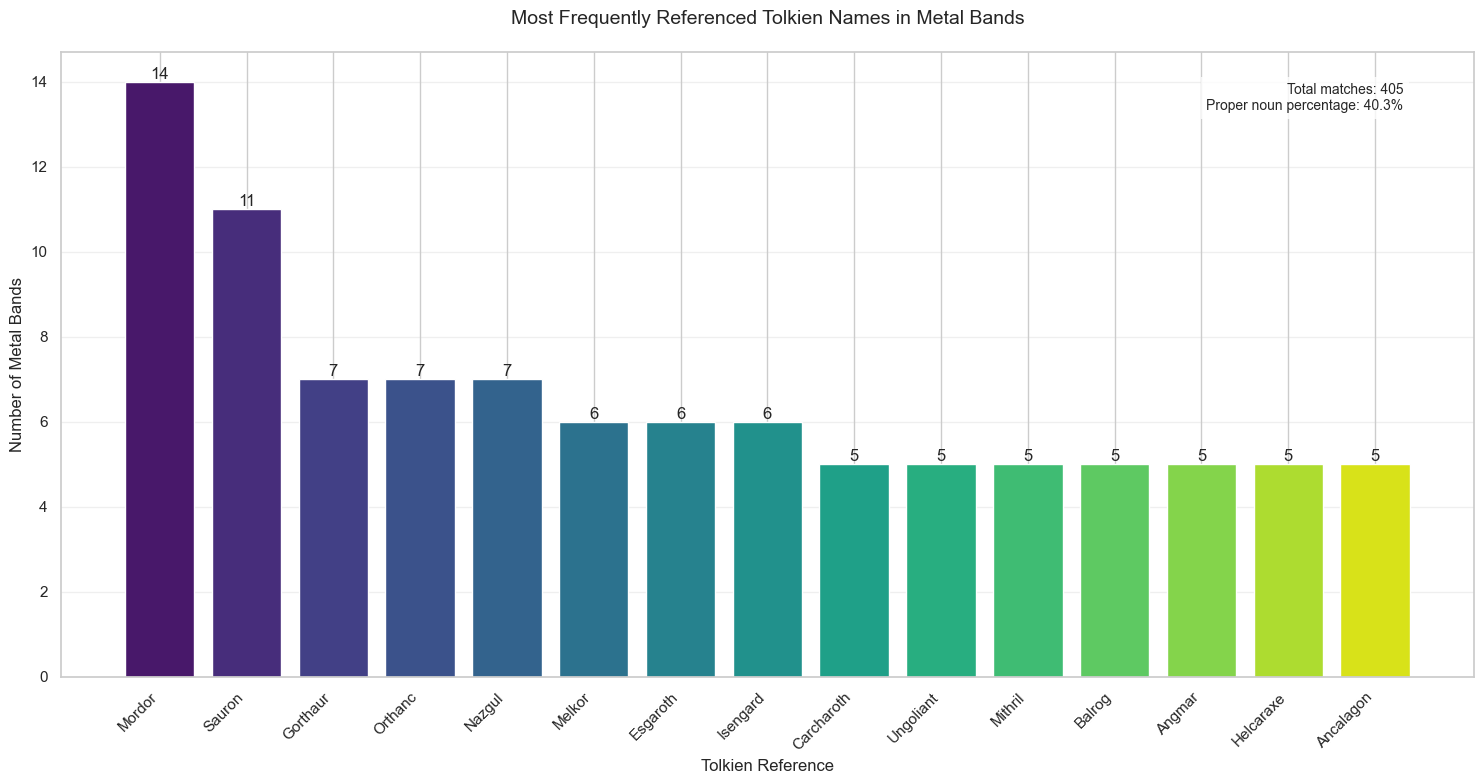

In [2]:
# First load the CSV data
df = pd.read_csv('reports/metal_band_matches.csv')

# Create a matches-only dataframe
matches_df = df[df['Band Name'] != 'No match found'].copy()

# Load proper nouns
with open('reports/unique_proper_nouns.txt', 'r', encoding='utf-8') as f:
    proper_nouns = {line.strip() for line in f}  # Using a set for faster lookups

# Filter matches_df to only include proper nouns
proper_noun_matches = matches_df[matches_df['Search Name'].isin(proper_nouns)]

# Count and plot most common search terms that found matches
term_counts = proper_noun_matches['Search Name'].value_counts()

# Print the top 10 with counts
print("\nTop 10 Most Used Proper Noun References:")
for term, count in term_counts.head(10).items():
    print(f"{term}: {count} bands")

# Print some statistics
print(f"\nTotal proper nouns with matches: {len(proper_noun_matches)}")
print(f"Percentage of matched terms that are proper nouns: {len(proper_noun_matches)/len(matches_df):.1%}")
# Create a vertical bar chart for top references
plt.figure(figsize=(15, 8))

# Get top 15 terms
top_terms = term_counts.head(15)

# Create bar chart
bars = plt.bar(
    range(len(top_terms)),
    top_terms.values,
    color=sns.color_palette('viridis', n_colors=len(top_terms))
)

# Customize the plot
plt.xticks(range(len(top_terms)), top_terms.index, rotation=45, ha='right')
plt.xlabel('Tolkien Reference', fontsize=12)
plt.ylabel('Number of Metal Bands', fontsize=12)
plt.title('Most Frequently Referenced Tolkien Names in Metal Bands', fontsize=14, pad=20)

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height)}',
             ha='center', va='bottom')

# Add a light grid for readability
plt.grid(axis='y', alpha=0.3)

# Add stats in top right corner
stats_text = (f'Total matches: {len(proper_noun_matches)}\n'
              f'Proper noun percentage: {len(proper_noun_matches)/len(matches_df):.1%}')
plt.text(0.95, 0.95, stats_text,
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
         ha='right', va='top', fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()

## Most Popular References

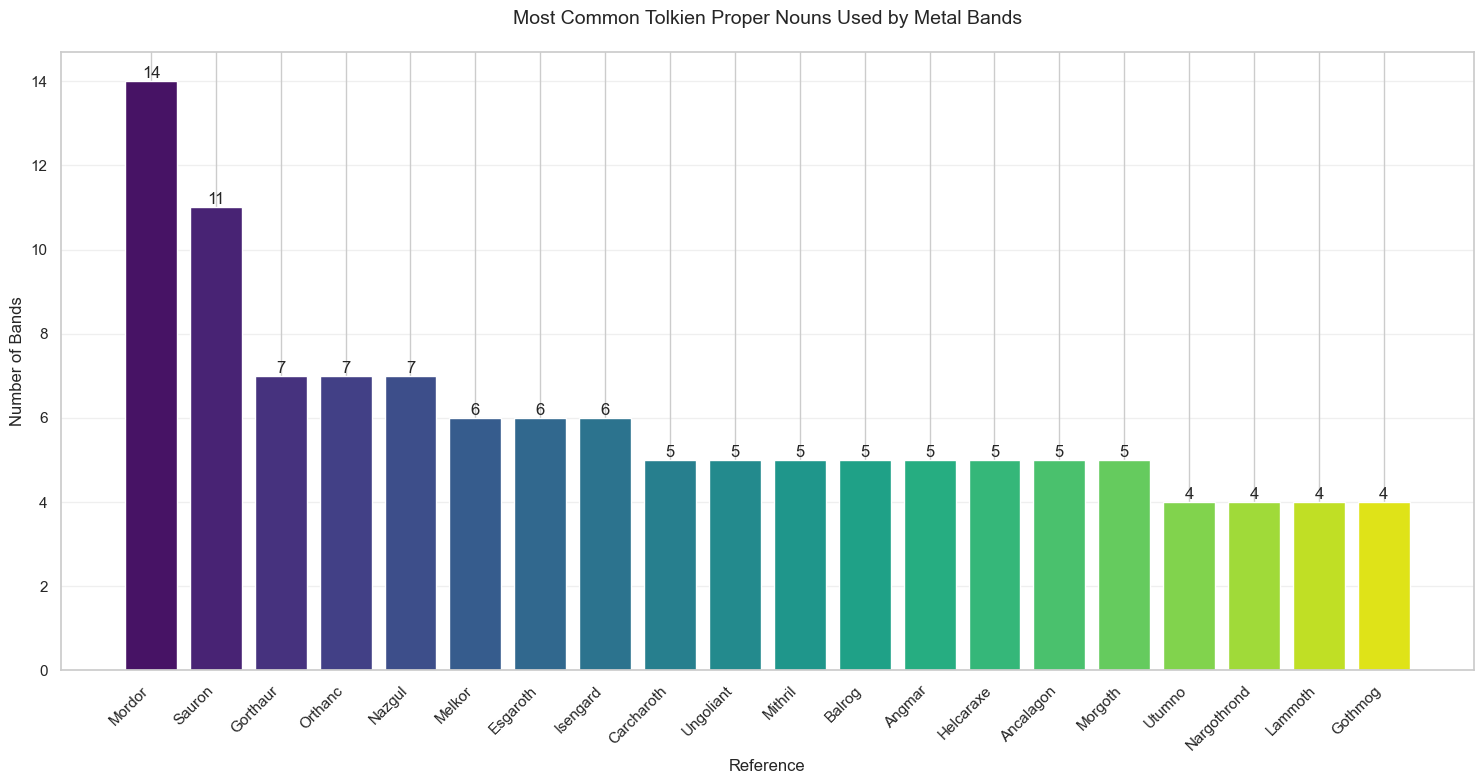

In [3]:
plt.figure(figsize=(15, 8))

# Get top 20 terms
top_terms = term_counts.head(20)

# Create bar chart with gradient colors
bars = plt.bar(
    range(len(top_terms)),
    top_terms.values,
    color=sns.color_palette('viridis', n_colors=len(top_terms))
)

# Customize the plot
plt.xticks(range(len(top_terms)), top_terms.index, rotation=45, ha='right')
plt.title('Most Common Tolkien Proper Nouns Used by Metal Bands', fontsize=14, pad=20)
plt.xlabel('Reference', fontsize=12)
plt.ylabel('Number of Bands', fontsize=12)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

## Name Length Analysis

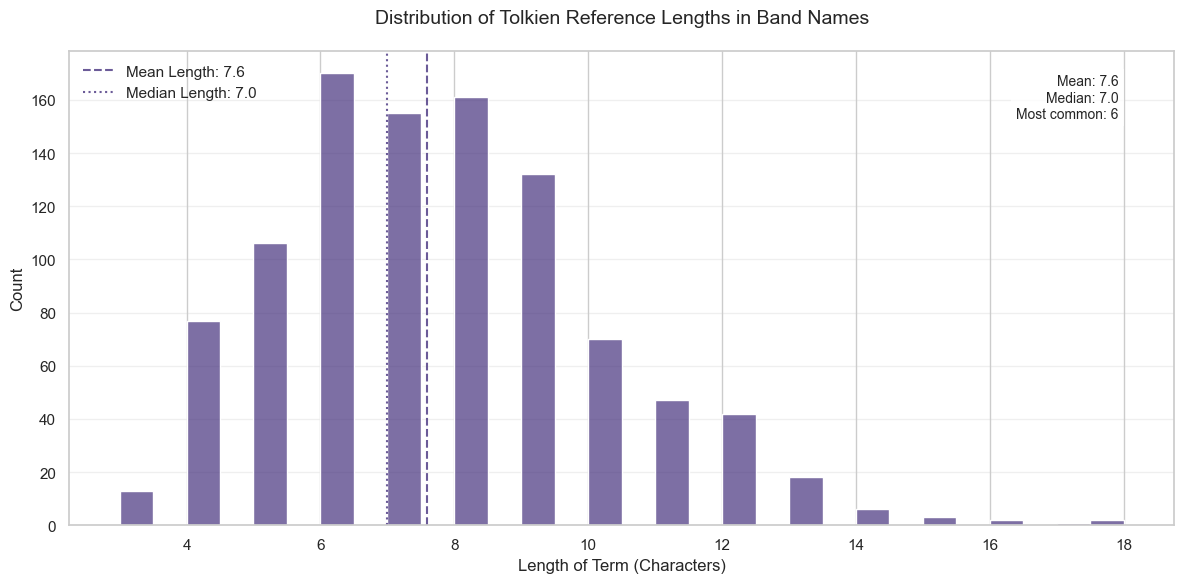

In [4]:
# Calculate term lengths first
matches_df['Term Length'] = matches_df['Search Name'].str.len()

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=matches_df, x='Term Length', bins=30, alpha=0.7)
plt.title('Distribution of Tolkien Reference Lengths in Band Names', fontsize=14, pad=20)
plt.xlabel('Length of Term (Characters)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add mean and median lines using consistent colors from palette
mean_length = matches_df['Term Length'].mean()
median_length = matches_df['Term Length'].median()

plt.axvline(x=mean_length, linestyle='--', alpha=0.8,
            label=f'Mean Length: {mean_length:.1f}')
plt.axvline(x=median_length, linestyle=':', alpha=0.8,
            label=f'Median Length: {median_length:.1f}')

plt.legend()

# Add stats in the corner
stats_text = (f'Mean: {mean_length:.1f}\n'
             f'Median: {median_length:.1f}\n'
             f'Most common: {matches_df["Term Length"].mode().iloc[0]}')
plt.text(0.95, 0.95, stats_text,
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
         ha='right', va='top', fontsize=10)

plt.tight_layout()


Top 20 Themes in Metal Bands:
death: 105
fantasy: 83
darkness: 76
tolkien: 71
nature: 61
anti: 54
war: 47
satanism: 45
christianity: 42
mythology: 40
paganism: 38
occultism: 29
life: 28
evil: 24
misanthropy: 22
history: 21
religion: 19
depression: 19
hate: 18
folklore: 16


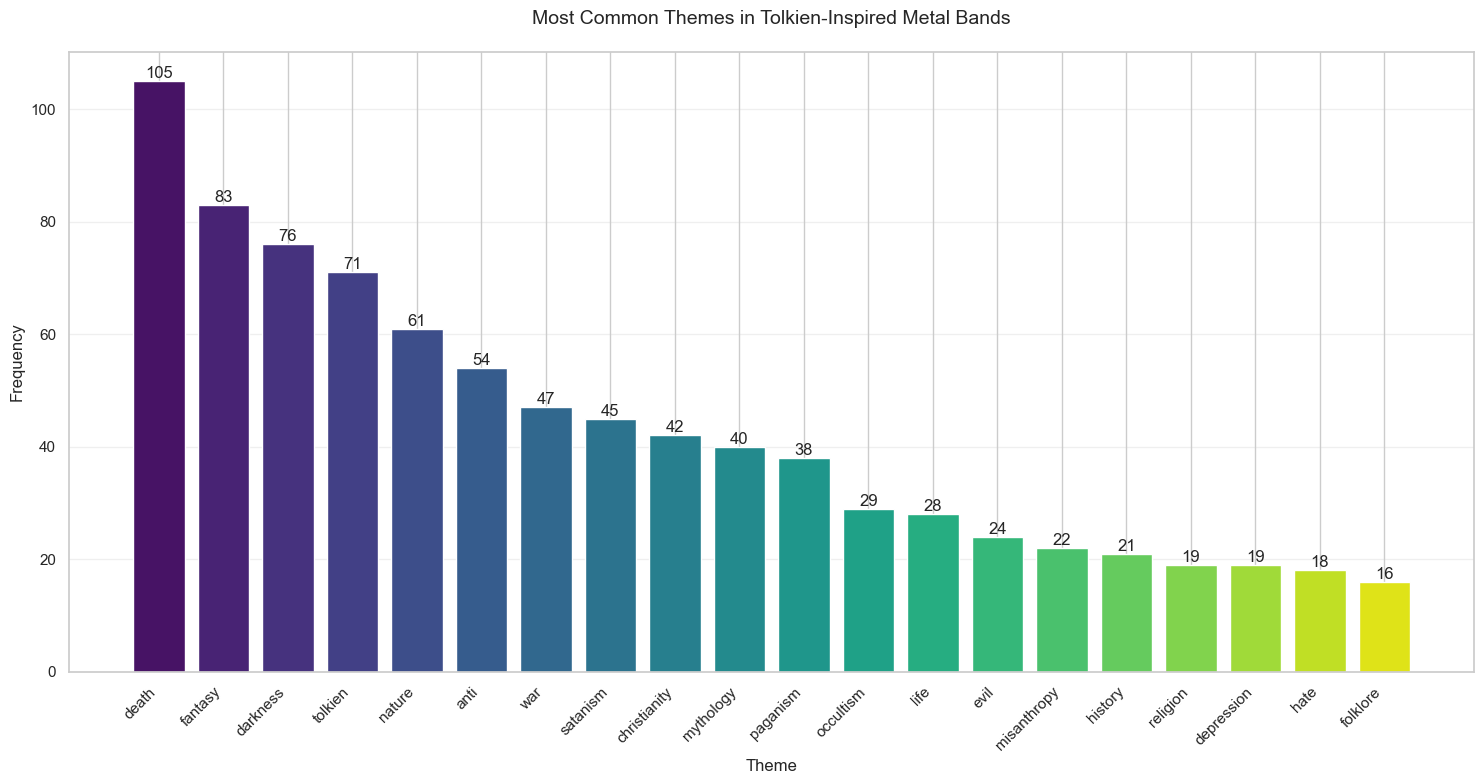

In [8]:
# Extract themes from the 'Themes' column, handling NaN values
themes_text = ' '.join([str(theme) for theme in matches_df['Themes'].dropna()])

# Split into words and clean up
words = re.findall(r'\w+', themes_text.lower())
word_counts = Counter(words)

# Remove common words and single letters
stop_words = {'the', 'and', 'of', 'in', 'a', 'to', 'n', 'na', 'none'}
word_counts = {word: count for word, count in word_counts.items() 
               if word not in stop_words and len(word) > 1}

# Get top 20 themes
top_themes = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:20])

# Create bar chart
plt.figure(figsize=(15, 8))
colors = sns.color_palette('viridis', n_colors=len(top_themes))
plt.bar(top_themes.keys(), top_themes.values(), color=colors)
plt.title('Most Common Themes in Tolkien-Inspired Metal Bands', fontsize=14, pad=20)
plt.xlabel('Theme', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, (theme, count) in enumerate(top_themes.items()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()

# Print the top themes and their counts (optional)
print("\nTop 20 Themes in Metal Bands:")
for theme, count in top_themes.items():
    print(f"{theme}: {count}")


Band Formation Year Statistics:
count     806.000000
mean     2003.441687
std         9.270186
min      1971.000000
25%      1997.000000
50%      2003.000000
75%      2010.000000
max      2024.000000
Name: Formed, dtype: float64


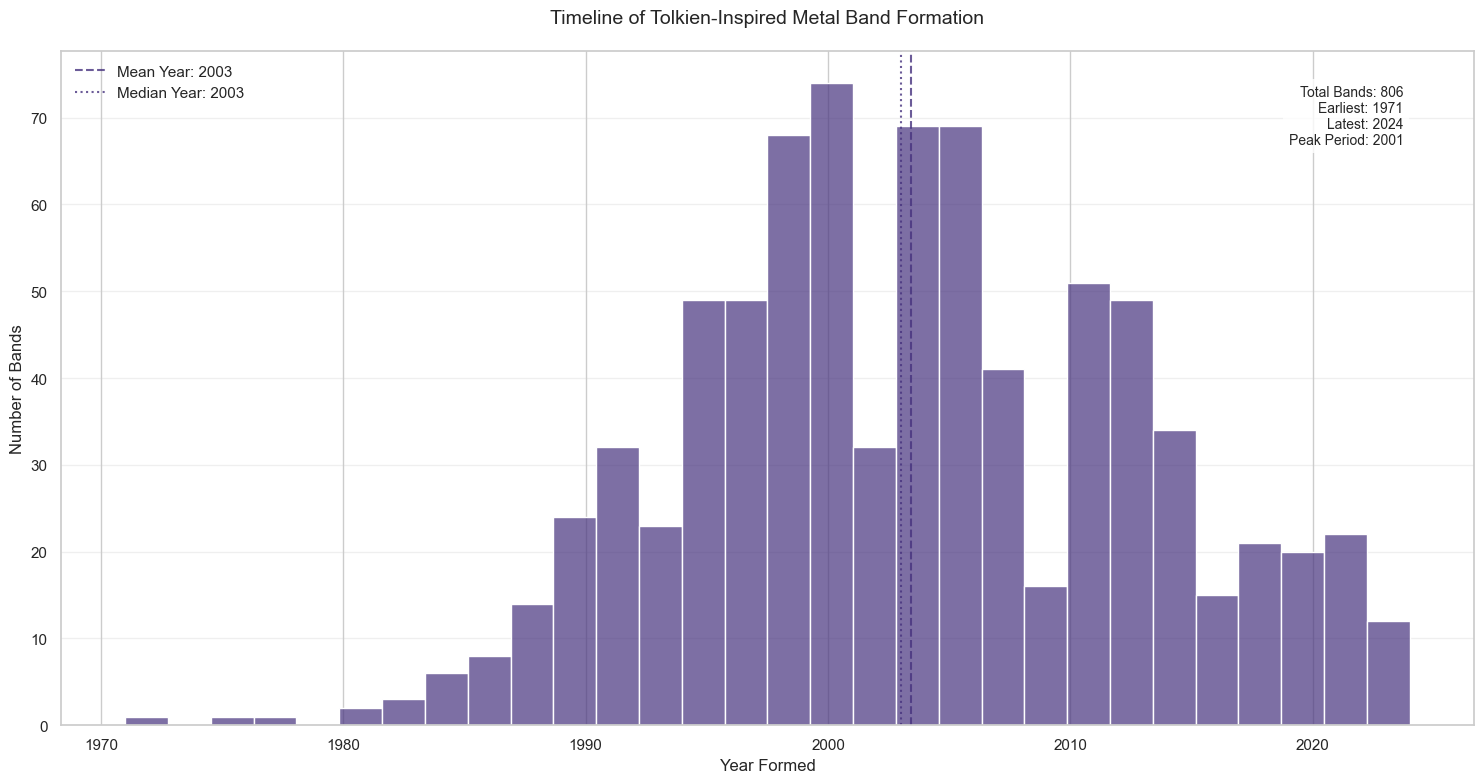

In [24]:
formed_years = pd.to_numeric(matches_df['Formed'], errors='coerce')
formed_years = formed_years.dropna()

plt.figure(figsize=(15, 8))
sns.histplot(data=formed_years, bins=30, alpha=0.7)
plt.title('Timeline of Tolkien-Inspired Metal Band Formation', fontsize=14, pad=20)
plt.xlabel('Year Formed', fontsize=12)
plt.ylabel('Number of Bands', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add mean and median year lines
mean_year = formed_years.mean()
median_year = formed_years.median()
plt.axvline(x=mean_year, linestyle='--', alpha=0.8,
            label=f'Mean Year: {mean_year:.0f}')
plt.axvline(x=median_year, linestyle=':', alpha=0.8,
            label=f'Median Year: {median_year:.0f}')

# Add stats box
stats_text = (f'Total Bands: {len(formed_years)}\n'
              f'Earliest: {int(formed_years.min())}\n'
              f'Latest: {int(formed_years.max())}\n'
              f'Peak Period: {formed_years.mode().iloc[0]:.0f}')
plt.text(0.95, 0.95, stats_text,
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
         ha='right', va='top', fontsize=10)

plt.legend()
plt.tight_layout()

# Print detailed statistics
print("\nBand Formation Year Statistics:")
print(formed_years.describe())